In [1]:
from scipy.stats import expon as ex
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# TASK 1

In [26]:
n = 100
l = 3
m = 3
r = 10
t = 0
times = []
time = []
t_ar = []
for i in range(n):
    a1 = sps.expon(scale = 1/l).rvs(size = 1)
    a2 = sps.expon(scale = 1/m).rvs(size = 1)
    if a1 > a2:
        if t < r:
            t += 1
        times.append(a2)
        t_ar.append(t)
    else:
        if t > 0:
            t -= 1
        times.append(a1)
        t_ar.append(t)
    if i == 0:
        time.append(times[0])
    else: 
        time.append(time[i-1]+times[i])

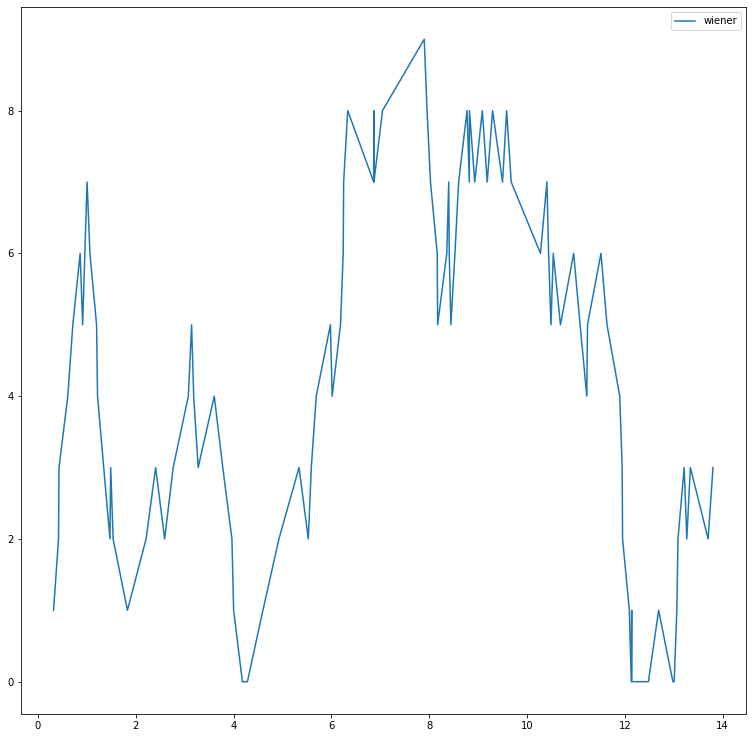

In [27]:
plt.figure(figsize = (13,13))
plt.plot(time,t_ar,label = 'wiener')
plt.legend()
plt.show()

In [28]:
import scipy.linalg as lg
M = []
for i in range(r):
    if i == 0:
        a = [0]*r
        a[0] = -l
        a[1] = l
        M.append(a)
    elif i == (r - 1):
        a = [0]*r
        a[r-1] = -m
        a[r-2] = m
        M.append(a)
    else:
        a = [0]*r
        a[i] = -(l+m)
        a[i+1] = m
        a[i-1] = l
        M.append(a)
s = []
s1 = 1/sum([(m/l)**i for i in range(r)])
s.append(s1)
for i in range(1,r):
    s.append(s[i-1]*m/l)
print(s)

[0.1, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002, 0.10000000000000002]


# TASK 2

In [20]:
n = 50
l = 3
m = 3
r = 10
t = 0
times = []
time = []
t_ar = []
gg = [0]*(r+1)
ggg = [0]*(r+1)
sad1 = []
sad2 = []
sad3 = []
for j in range(400):
    t = 0
    tau1 = 0
    tau2 = 0
    for i in range(n):
        a1 = sps.expon(scale = 1/l).rvs(size = 1)
        a2 = sps.expon(scale = 1/m).rvs(size = 1)       
        if a1 > a2:
            if t < r:
                t += 1
            times.append(a2)
            t_ar.append(t)
        else:
            if t > 0:
                t -= 1
            times.append(a1)
            t_ar.append(t)
        if i == 0:
            time.append(times[0])
        else: 
            time.append(time[i-1]+times[i])
            if a1 < a2:
                sad1.append(time[i]-time[tau1])
                tau1 = i
            else:
                sad2.append(time[i]-time[tau2])
                tau2 = i
        for j in range(r+1):
            if t == j:
                gg[j] += 1/(400*n)
    ggg[t] += 1/400

In [21]:
print(gg)

[0.19414999999998678, 0.17379999999998902, 0.14059999999999268, 0.1140999999999956, 0.09419999999999779, 0.07509999999999989, 0.060000000000001205, 0.04870000000000088, 0.03965000000000062, 0.03225000000000041, 0.027450000000000273]


In [22]:
print(ggg)

[0.13250000000000006, 0.11000000000000006, 0.08500000000000003, 0.09750000000000004, 0.13500000000000006, 0.09500000000000004, 0.09750000000000004, 0.06250000000000001, 0.06250000000000001, 0.08000000000000003, 0.0425]


In [23]:
print(1/np.mean(sad1),1/np.mean(sad2))

3.025332704990504 2.975148527045696
